In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
supply_data= pd.read_csv('C:/Users/Patron/Desktop/study/fin 850/SupplyData.csv')
supply_data['Date'] = pd.to_datetime(supply_data['Date'])
supply_data = supply_data.sort_values('Date')
supply_data['Supply'] = supply_data['Supply'].str.replace(',', '').astype(float)

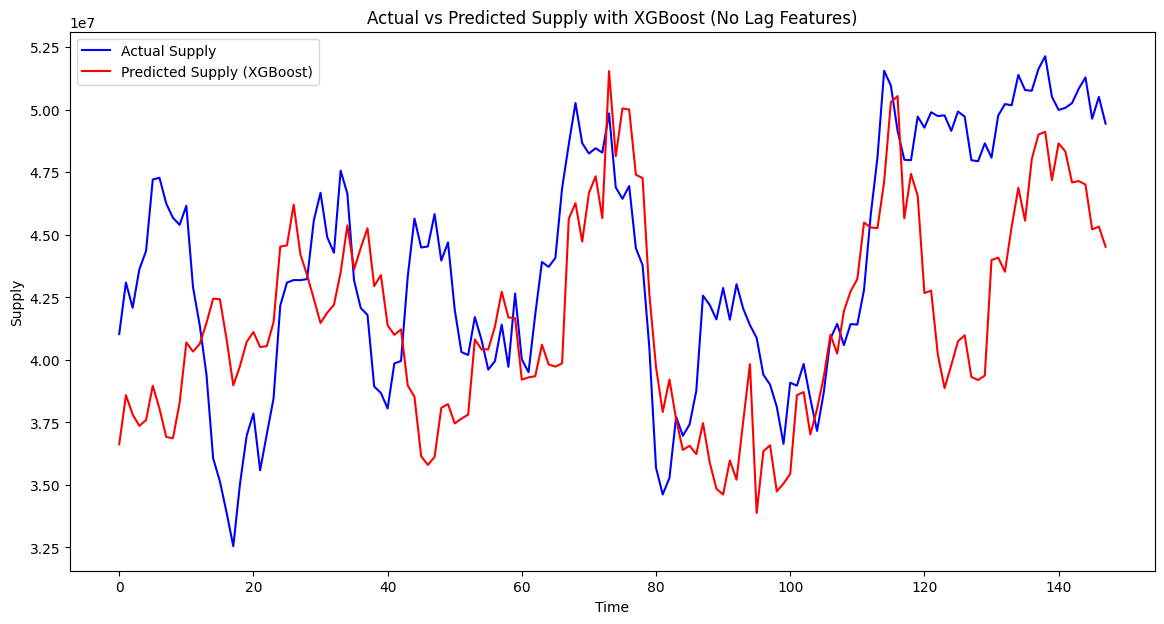

Mean Absolute Error (MAE): 3871929.121621622
Root Mean Squared Error (RMSE): 4673496.187679375


In [5]:
# Ensure the 'Date' column is properly set as a datetime index
supply_data['Date'] = pd.to_datetime(supply_data['Date'])  # Convert to datetime
supply_data.set_index('Date', inplace=True)  # Set as index

# Feature Engineering (without lag features)
supply_data['day'] = supply_data.index.day
supply_data['month'] = supply_data.index.month
supply_data['year'] = supply_data.index.year
supply_data['day_of_week'] = supply_data.index.dayofweek

# Train-Test Split
train_size = int(len(supply_data) * 0.8)
train_data = supply_data.iloc[:train_size]
test_data = supply_data.iloc[train_size:]

X_train = train_data[['day', 'month', 'year', 'day_of_week']]
y_train = train_data['Supply']
X_test = test_data[['day', 'month', 'year', 'day_of_week']]
y_test = test_data['Supply']

# Train XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Supply', color='blue')
plt.plot(y_pred, label='Predicted Supply (XGBoost)', color='red')
plt.title('Actual vs Predicted Supply with XGBoost (No Lag Features)')
plt.xlabel('Time')
plt.ylabel('Supply')
plt.legend()
plt.show()

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
